In [412]:
%load_ext autoreload
%autoreload 2
import random
from Environment import Environment
from CompanyAgent import CompanyAgent
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [413]:
def generate_agents(
        count,
        expected_emission, 
        initial_allowance, 
        sell_price, 
        buy_price, 
        activate_abatement=True, 
        emission_rate_noise=0.01, 
        expected_emission_noise=0.1,
        advanced_trading=False):
    print(expected_emission)
    agents = []
    for i in range(count):
        agents.append(CompanyAgent(
            np.random.uniform(*expected_emission),
            np.random.uniform(*initial_allowance),
            np.random.uniform(*sell_price),
            np.random.uniform(*buy_price),
            activate_abatement=activate_abatement,
            emission_rate_noise=emission_rate_noise,
            expected_emission_noise=expected_emission_noise,
            advanced_trading=advanced_trading))
    return agents


In [426]:
def init_eu(emission_rate_noise=0.1, expected_emission_noise=0.1):
    df = pd.read_csv("./data/data_for_init_melted.csv")
    training_data = df[['year', 'INSTALLATION_NAME', 'ALLOCATION_', 'VERIFIED_EMISSIONS_']][df.year==2018].dropna()
    training_data = training_data[['ALLOCATION_', 'VERIFIED_EMISSIONS_']].to_numpy().tolist()

    agents = []
    for i in range(len(training_data)):
        agents.append(CompanyAgent(
            training_data[i][1],
            training_data[i][0],
            np.random.uniform(0, 100),
            np.random.uniform(0, 100),
            activate_abatement=True,
            emission_rate_noise=training_data[i][1]*np.random.uniform(0.01, 0.01)/365,
            expected_emission_noise=training_data[i][1]*0.1,
            advanced_trading=True))
    expected_emissions = np.array(training_data)[:, 1].sum() - np.array(training_data)[:, 0].sum()
    print(expected_emissions)
    agents.append(CompanyAgent(
        0,
        0.98*expected_emissions,
        0,
        100,
        0,
        0,
        False,
        False))

    return agents

770586724.0
hisst
start simulation


  0%|          | 0/365 [00:00<?, ?it/s]

hi


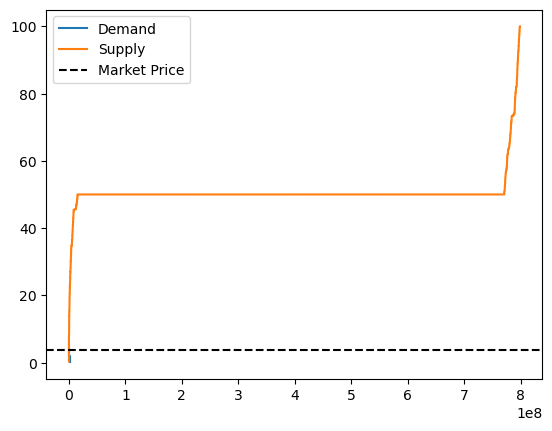

hi


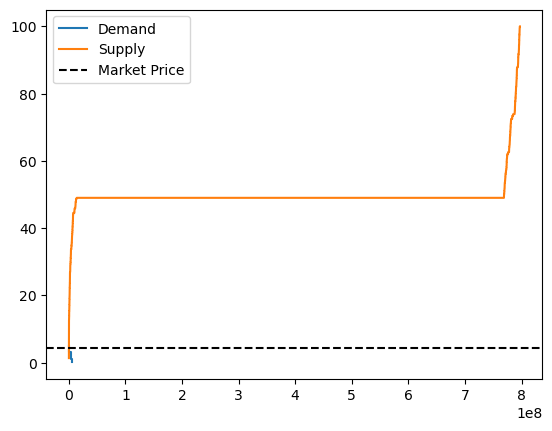

  1%|          | 2/365 [00:00<00:29, 12.12it/s]

hi


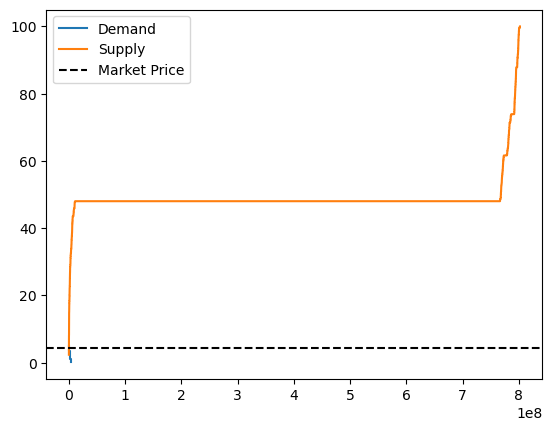

100%|██████████| 365/365 [00:16<00:00, 21.71it/s]


In [438]:
random.seed(41)
np.random.seed(41)
# create two agents
# define 100 agents with random expected emission, initial allowance, sell price and buy pric

states = ['idle', 'simple_trade', 'simple_trade_deficit', 'noise_trade_deficit']

state = "noise_trade_deficit_abatement"
state = "random_uniform"
state = "eu"

agents = []
if state == "idle":
    #base state, everyone has what he needs
    idle_agents = generate_agents(
        1000, 
        (10000,10000), 
        (10000,10000), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0, 
        expected_emission_noise=0)
    agents += idle_agents

if state == "simple_trade":
    #trading but market is saturated behavior
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10100, 10100), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0, 
        expected_emission_noise=0)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9900, 9900), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0, 
        expected_emission_noise=0)
    agents += selling_agents
    agents += buying_agents

if state == "simple_trade_deficit":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10100, 10100), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0, 
        expected_emission_noise=0)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9800, 9800), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0, 
        expected_emission_noise=0)
    agents += selling_agents
    agents += buying_agents

if state == "noise_trade_deficit":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10100, 10100), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9800, 9800), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    agents += selling_agents
    agents += buying_agents

if state == "noise_trade_deficit_advanced":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10100, 10100), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9800, 9800), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1,
        advanced_trading=True)
    agents += selling_agents
    agents += buying_agents

if state == "noise_trade_deficit_abatement_advanced":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10100, 10100), 
        (0,0), 
        (100,100),
        activate_abatement=True, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9800, 9800), 
        (0,0), 
        (100,100),
        activate_abatement=True, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1,
        advanced_trading=True)
    agents += selling_agents
    agents += buying_agents

if state == "noise_trade_saturation":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,10000), 
        (10200, 10200), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    buying_agents = generate_agents(
        100, 
        (10000,10000), 
        (9900, 9900), 
        (0,0), 
        (100,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    agents += selling_agents
    agents += buying_agents

if state == "random_uniform":
    #trading but market has a dificit
    selling_agents = generate_agents(
        100, 
        (10000,11000), 
        (10100, 11100), 
        (0,100), 
        (0,100),
        activate_abatement=False, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1)
    buying_agents = generate_agents(
        100, 
        (10000,11000), 
        (9800, 10800), 
        (0,100), 
        (0,100),
        activate_abatement=True, 
        emission_rate_noise=0.1, 
        expected_emission_noise=0.1,
        advanced_trading=True)
    agents += selling_agents
    agents += buying_agents
   

if state == "eu":
    agents = init_eu()


env = Environment(5, agents, mode="seller_preferred")
print("start simulation")
for i in tqdm.tqdm(range(365)):
    if i < 3:# or (i > 188 and i < 193):    
        env.update(plot=True)
    else:
        env.update(plot=False)
    if i%10 == 0:
        mean = np.random.uniform(0.5, 1.5)
        for agent in env.agents:
            agent.emission_rate = max(0, agent.emission_rate*np.random.normal(mean, 0.3))

for agent in env.agents:
    env.track_agent_state(agent)


trade_df = pd.DataFrame(env.trade_hist_dict)
market_df = pd.DataFrame(env.market_hist_dict)
agent_df = pd.DataFrame(env.agent_hist_dict)

#join the two dataframes on days
df = pd.merge(trade_df, market_df, how = "right", on="day")

/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

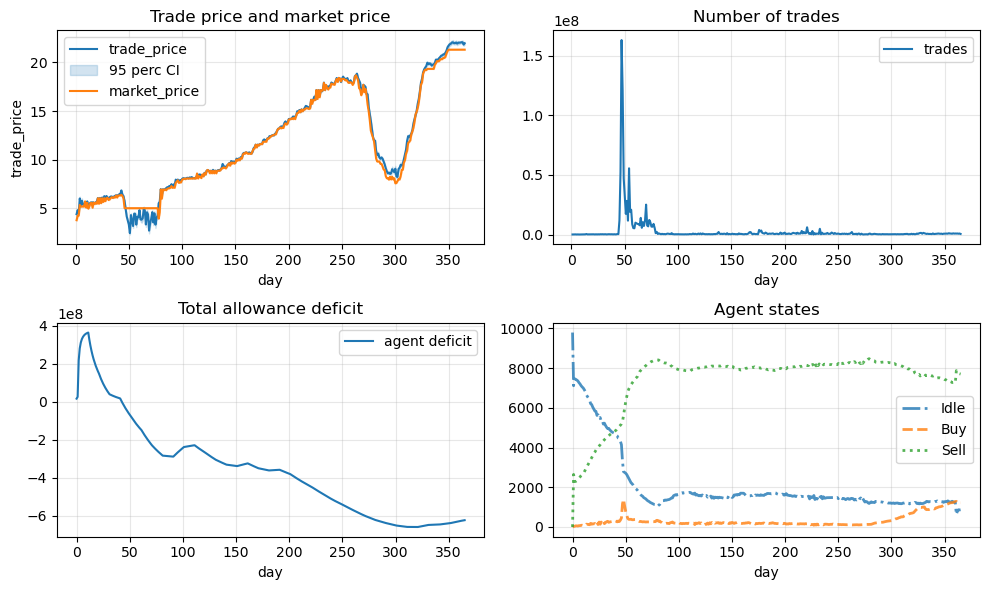

In [439]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

grid = True
grid_alpha = 0.3

# Plot 1: Lineplot for trade_price and market_price
try:
    sns.lineplot(x="day", y="trade_price", data=df, ax=axes[0, 0])
    sns.lineplot(x="day", y="market_price", data=df, ax=axes[0, 0])
except:
    print("No trades were made")
axes[0, 0].legend(["trade_price", "95 perc CI","market_price"])
axes[0, 0].title.set_text("Trade price and market price")
axes[0, 0].grid(grid, alpha=grid_alpha)

# Plot 2: Lineplot for trade_price count
df.groupby("day").sum().trade_amount.plot(kind="line", ax=axes[0, 1])
axes[0, 1].legend(["trades"])
axes[0, 1].title.set_text("Number of trades")
axes[0, 1].grid(grid, alpha=grid_alpha)

# Plot 3: Lineplot for agent deficit
agent_df.groupby("day").deficit.sum().plot(kind="line", ax=axes[1, 0], alpha=1)
axes[1, 0].legend(["agent deficit"])
axes[1, 0].title.set_text("Total allowance deficit")
#set ylim to 0 to 20000
axes[1, 0].grid(grid, alpha=grid_alpha)

# Plot 4: Lineplot for agent count separated by state
state_counts = agent_df.groupby("day").state.value_counts().unstack(fill_value=0)
try:
    state_counts['idle'].plot(kind="line", linestyle='-.',ax=axes[1, 1], alpha = 0.8, lw=2)  # Solid line for 'idle'
except:
    print("No idles were made")
try:
    state_counts['buy'].plot(kind="line", linestyle='--', ax=axes[1, 1], alpha = 0.8, lw=2)  # Dashed line for 'buy'
except:
    print("No buys were made")
try:
    state_counts['sell'].plot(kind="line", linestyle=':', ax=axes[1, 1], alpha = 0.8, lw=2)  # Dotted line for 'sell'
except:
    print("No sells were made")

axes[1, 1].legend(["Idle", "Buy", "Sell"])
axes[1, 1].grid(grid, alpha=grid_alpha)
axes[1, 1].title.set_text("Agent states")


# Adjust layout
plt.tight_layout()
plt.show()

In [341]:
#get number of agents each day
agent_df[agent_df.day==365].value_counts("state")

state
buy     7448
sell    1907
idle     428
Name: count, dtype: int64

/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lexi/miniconda3/envs/modsim/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

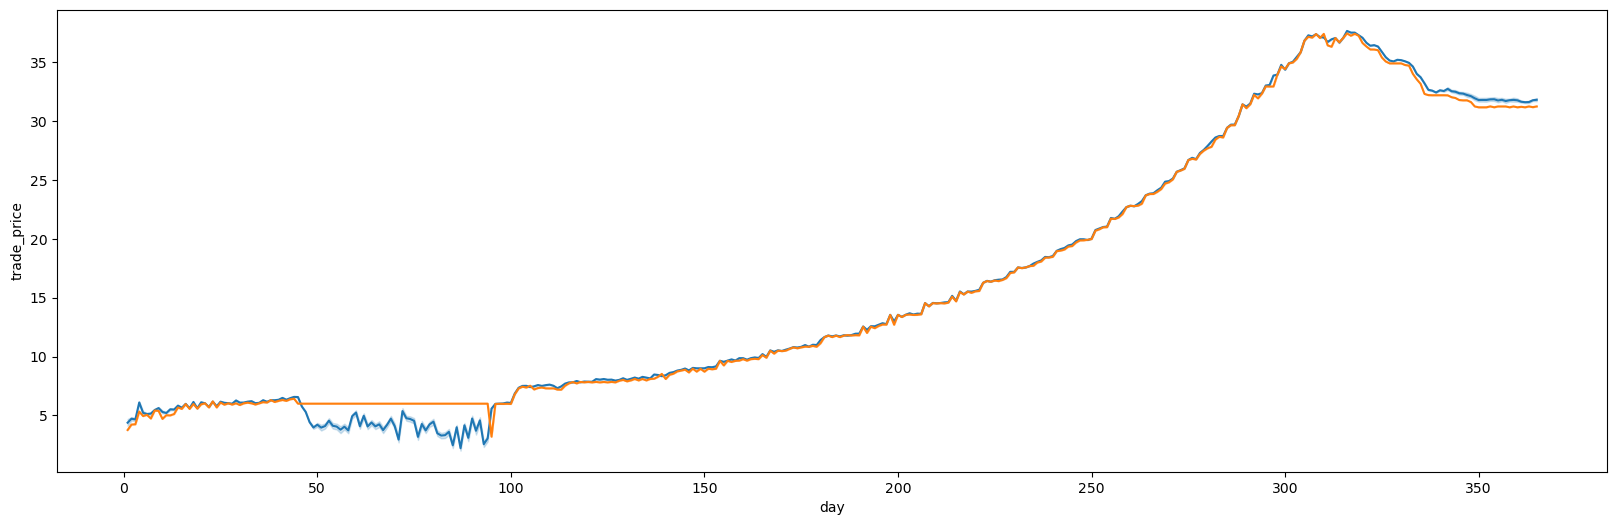

In [433]:

plt.figure(figsize=(20, 6))
sns.lineplot(x="day", y="trade_price", data=df)
sns.lineplot(x="day", y="market_price", data=df)
plt.show()

In [342]:
agent_df.groupby(["day", "state"]).sum()

deficit      count
day state                        
0   idle   770586724.0          0
1   buy    864921497.0  864895857
    idle        -783.0          0
    sell   -94323060.0          0
2   buy    864899170.0  864873640
...                ...        ...
364 idle       -3455.0          0
    sell   -87288519.0          0
365 buy    858263605.0  858248158
    idle       -3654.0          0
    sell   -87273250.0          0

[1096 rows x 2 columns]

<Axes: xlabel='day'>

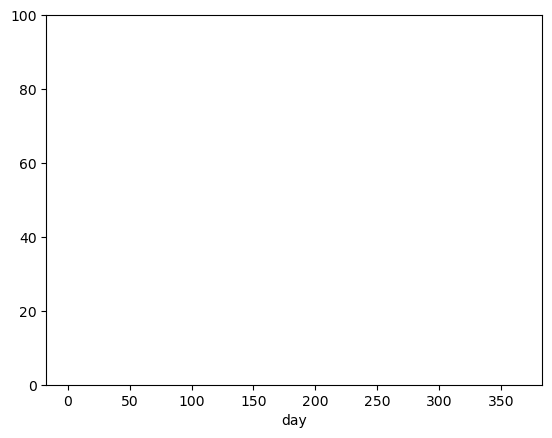

In [343]:
df.groupby("day").trade_price.count().plot(ylim=[0, 100])


In [344]:
import numpy as np
import numpy
q_supplier = np.random.normal(0, 1, 10000)
p_supplier = np.random.normal(0, 1, 10000)
q_demander = np.random.normal(0, 1, 10000)
p_demander = np.random.normal(0, 1, 10000)

In [345]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = numpy.result_type(*arrays)
    arr = numpy.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(numpy.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [346]:
q_supplier = np.array([1, 5, 8, 10])
p_supplier = np.array([0.3, 0.5, 0.7, 0.9])
q_demander = np.array([1, 3, 12, 15])
p_demander = np.array([1.2, 1.0, 0.8, 0.1])

In [347]:
sns.

SyntaxError: invalid syntax (1118962691.py, line 1)

In [ ]:
q_res = cartesian_product(q_supplier, q_demander)
p_res = cartesian_product(p_supplier, p_demander)

In [ ]:
np.argmax((q_res[:,0] >= q_res[:,1]) & (p_res[:,0] > p_res[:,1]))

0